In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
print("hello")

hello


In [3]:
data = pd.read_csv('train.csv')

In [4]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data = np.array(data)
m, n = data.shape
m

42000

In [6]:
np.random.shuffle(data)

In [7]:
data_dev = data[0:1000].T

In [8]:
Y_dev = data_dev[0]
Y_dev

array([3, 5, 3, 3, 8, 4, 6, 9, 7, 6, 7, 2, 8, 1, 8, 0, 8, 7, 4, 0, 0, 5,
       2, 1, 3, 9, 1, 3, 4, 7, 1, 4, 6, 0, 0, 4, 5, 4, 3, 5, 8, 1, 9, 3,
       6, 5, 7, 7, 8, 3, 7, 7, 3, 0, 8, 8, 6, 5, 7, 3, 5, 3, 2, 6, 2, 5,
       1, 1, 4, 5, 1, 1, 1, 3, 2, 7, 6, 6, 2, 8, 4, 6, 2, 1, 3, 9, 3, 2,
       6, 6, 1, 2, 6, 1, 6, 8, 3, 7, 6, 1, 1, 2, 9, 6, 7, 1, 9, 7, 2, 9,
       2, 5, 5, 3, 5, 3, 8, 5, 9, 6, 3, 4, 4, 8, 0, 1, 3, 1, 0, 4, 4, 1,
       2, 4, 4, 9, 6, 1, 5, 6, 8, 4, 8, 5, 9, 9, 3, 1, 2, 2, 6, 6, 3, 8,
       2, 2, 0, 6, 4, 3, 8, 7, 5, 0, 4, 0, 3, 8, 7, 4, 3, 1, 6, 0, 9, 2,
       6, 4, 1, 5, 2, 5, 1, 2, 8, 4, 9, 7, 1, 4, 5, 2, 6, 3, 9, 0, 5, 4,
       1, 1, 6, 4, 1, 8, 4, 1, 0, 2, 9, 6, 4, 3, 5, 7, 2, 6, 7, 9, 7, 9,
       9, 1, 7, 4, 9, 4, 9, 9, 0, 4, 8, 2, 8, 8, 5, 6, 3, 1, 6, 1, 5, 7,
       5, 8, 9, 5, 8, 7, 4, 3, 7, 0, 6, 7, 9, 8, 6, 5, 3, 8, 2, 1, 9, 2,
       0, 4, 8, 6, 9, 2, 4, 5, 1, 9, 1, 5, 4, 7, 9, 8, 3, 3, 7, 9, 5, 4,
       2, 4, 1, 4, 1, 9, 6, 0, 1, 7, 3, 5, 5, 2, 1,

In [9]:
X_dev = data_dev[1:n]
X_dev

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [10]:
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]

In [11]:
X_train[0].shape

(41000,)

In [12]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2   

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [13]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [14]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

/var/folders/_j/2fw857sd4y5fz858mxmnrj0m0000gn/T/ipykernel_46379/3929439117.py:12: RuntimeWarning: overflow encountered in exp
  A = np.exp(Z) / sum(np.exp(Z))
/var/folders/_j/2fw857sd4y5fz858mxmnrj0m0000gn/T/ipykernel_46379/3929439117.py:12: RuntimeWarning: invalid value encountered in divide
  A = np.exp(Z) / sum(np.exp(Z))


Iteration:  0
[2 4 2 ... 4 4 4] [2 3 0 ... 1 4 0]
0.0846829268292683
Iteration:  10
[0 0 0 ... 0 0 0] [2 3 0 ... 1 4 0]
0.09873170731707318
Iteration:  20
[0 0 0 ... 0 0 0] [2 3 0 ... 1 4 0]
0.09873170731707318
Iteration:  30
[0 0 0 ... 0 0 0] [2 3 0 ... 1 4 0]
0.09873170731707318
Iteration:  40
[0 0 0 ... 0 0 0] [2 3 0 ... 1 4 0]
0.09873170731707318
Iteration:  50
[0 0 0 ... 0 0 0] [2 3 0 ... 1 4 0]
0.09873170731707318
Iteration:  60
[0 0 0 ... 0 0 0] [2 3 0 ... 1 4 0]
0.09873170731707318
Iteration:  70
[0 0 0 ... 0 0 0] [2 3 0 ... 1 4 0]
0.09873170731707318
Iteration:  80
[0 0 0 ... 0 0 0] [2 3 0 ... 1 4 0]
0.09873170731707318
Iteration:  90
[0 0 0 ... 0 0 0] [2 3 0 ... 1 4 0]
0.09873170731707318
Iteration:  100
[0 0 0 ... 0 0 0] [2 3 0 ... 1 4 0]
0.09873170731707318
Iteration:  110
[0 0 0 ... 0 0 0] [2 3 0 ... 1 4 0]
0.09873170731707318
Iteration:  120
[0 0 0 ... 0 0 0] [2 3 0 ... 1 4 0]
0.09873170731707318
Iteration:  130
[0 0 0 ... 0 0 0] [2 3 0 ... 1 4 0]
0.09873170731707318
Iter

In [15]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [0]
Label:  0


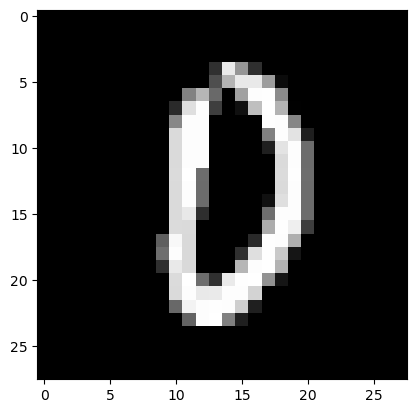

In [16]:
test_prediction(5,W1,b1,W2,b2)

Prediction:  [0]
Label:  4


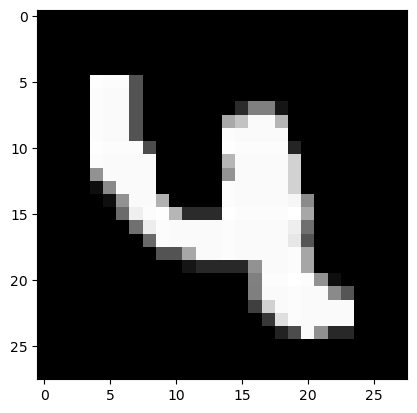

In [17]:
test_prediction(10,W1,b1,W2,b2)